In [136]:
import os
import numpy as np
from coffea.util import load, save
import matplotlib.pyplot as plt
import coffea.hist as hist
import time



lumi= 21.1 * 1000
GenDY = 1933600
xsecDY=2137.0

weightDY = lumi * xsecDY / GenDY

def reduce(folder,sample_list):
	 
	variables = []
	print(os.listdir(folder))

	hsum_charge= hist.Hist(
		   "Events",
		   hist.Cat("dataset","Dataset"),
		   hist.Bin("charge","charge sum of electrons", 6, -3, 3),
	)

	hsum_Mee = hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("mass","Z mass",100,0,200)	
	)
	hsum_Mee_60_120 = hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("mass_60_120","Z mass",60,60,120)	
	)
	hsum_ele1pt = hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele1pt","Leading Electron $P_{T}$ [GeV]",300,0,600)	
	)
	hsum_ele2pt =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele2pt","Subleading $Electron P_{T}$ [GeV]", 300, 0, 600),
	)
	
	hsum_ele1eta= hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele1eta","Leading Electron $\eta$ [GeV]", 20, -5, 5),
	)
	
	hsum_ele2eta =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele2eta","Subleading Electron $\eta$ [GeV]", 20, -5, 5),
	)
	hsum_ele1phi =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele1phi","Leading Electron $\phi$ [GeV]", 20, -3.15, 3.15),
	)
	
	hsum_ele2phi =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("ele2phi","Subleading Electron $\phi$ [GeV]", 20, -3.15, 3.15),
	)

	hsum_os_Mee =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_mass","$m_{e+e-}$ [GeV]", 100, 0, 200),
	)
	hsum_os_Mee_60_120 = hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_mass_60_120","$m_{e+e-}$ [GeV]", 60, 60, 120),
	)
	hsum_os_ele1pt =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele1pt","Leading Electron $P_{T}$ [GeV]", 300, 0, 600),
	)
	
	hsum_os_ele2pt= hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele2pt","Subleading $Electron P_{T}$ [GeV]", 300, 0, 600),
	)
	hsum_os_ele1eta =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele1eta","Leading Electron $\eta$ [GeV]", 20, -5, 5),
	)
	
	hsum_os_ele2eta =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele2eta","Subleading Electron $\eta$ [GeV]", 20, -5, 5),
	)
	hsum_os_ele1phi =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele1phi","Leading Electron $\phi$ [GeV]", 20, -3.15, 3.15),
	)
	
	hsum_os_ele2phi =  hist.Hist(
		"Events",
		hist.Cat("dataset","Dataset"),
		hist.Bin("os_ele2phi","Subleading Electron $\phi$ [GeV]", 20, -3.15, 3.15),
	)
	hsum_nElectrons = hist.Hist(
        "Events",
        hist.Cat("dataset","Dataset"),
        hist.Bin("nElectrons","# of Electrons",10,0,10)
    )


	hists={}
	sumw_DY=0
	sumw_Egamma=0
	
	for filename in os.listdir(folder):
		hin = load(folder + '/' + filename)
		hists[filename] = hin.copy()

		if filename.split('_')[0] not in sample_list:
			continue;

		sumw_DY += hists[filename]['sumw']['DY']
		sumw_Egamma += hists[filename]['sumw']['Egamma']


		hsum_charge.add(hists[filename]['charge'])
		#hsum_nElectrons.add(hists[filename]['nElectrons'])
		
		#hsum_Mee.add(hists[filename]['mass'])
		#hsum_Mee_60_120.add(hists[filename]['mass_60_120'])
		#hsum_ele1pt.add(hists[filename]['ele1pt'])
		#hsum_ele2pt.add(hists[filename]['ele2pt'])
		#hsum_ele1eta.add(hists[filename]['ele1eta'])
		#hsum_ele2eta.add(hists[filename]['ele2eta'])
		#hsum_ele1phi.add(hists[filename]['ele1phi'])
		#hsum_ele2phi.add(hists[filename]['ele2phi'])
		
		#hsum_os_Mee.add(hists[filename]['os_mass'])
		#hsum_os_Mee_60_120.add(hists[filename]['os_mass_60_120'])
		#hsum_os_ele1pt.add(hists[filename]['os_ele1pt'])
		#hsum_os_ele2pt.add(hists[filename]['os_ele2pt'])
		#hsum_os_ele1eta.add(hists[filename]['os_ele1eta'])
		#hsum_os_ele2eta.add(hists[filename]['os_ele2eta'])
		#hsum_os_ele1phi.add(hists[filename]['os_ele1phi'])
		hsum_os_ele2phi.add(hists[filename]['os_ele2phi'])





	print("Passing Trigger DY: ",sumw_DY * lumi * xsecDY / GenDY  )
	print("Passing Trigger Egamma: ",sumw_Egamma)
	return hsum_charge,hsum_os_ele2phi

In [137]:
file_path="condorOut_Trio_MasswindowO"


# ---->  Make hist
print("Start processing.. ")
start = time.time()

#sample_list = ['WZ','DY','Egamma']
sample_list = ['DY','Egamma']


h1, h1_os  = reduce(file_path,sample_list)


print("######## Loaded hist ############" )

## Noramlize    
scales={
    'DY' : weightDY
}
h1.scale(scales,axis='dataset')
h1_os.scale(scales,axis='dataset')


elapsed_time = time.time() - start
print("Time: ",elapsed_time)
# <--------- 

Start processing.. 
['DY_Run2018_40000.futures', 'DY_Run2018_280000.futures', 'Egamma_Run2018B_50000.futures', 'Egamma_Run2018A_50000.futures', 'Egamma_Run2018A_40000.futures', 'Egamma_Run2018B_280000.futures', 'Egamma_Run2018A_280000.futures']
Passing Trigger DY:  19699850.726417046
Passing Trigger Egamma:  250894906.0
######## Loaded hist ############
Time:  0.009071588516235352


End processing.. make plot
 


/home/jkim/miniconda3/envs/pyHEP/lib/python3.8/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/home/jkim/miniconda3/envs/pyHEP/lib/python3.8/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/home/jkim/miniconda3/envs/pyHEP/lib/python3.8/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


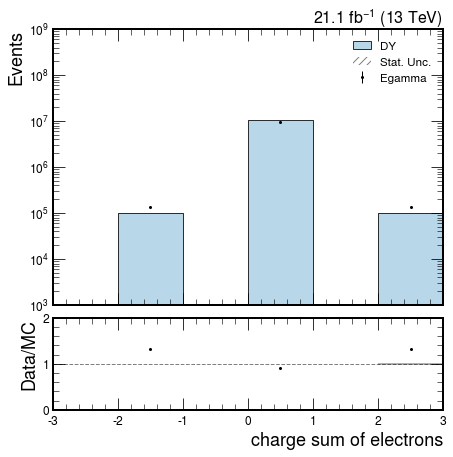

In [139]:
# ----> Plotting 
print("End processing.. make plot")
print(" ")
# make a nice ratio plot, adjusting some font sizes


import mplhep as hep
plt.style.use(hep.style.CMS)



plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7,7),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)

fig.subplots_adjust(hspace=.07)


from cycler import cycler
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
ax.set_prop_cycle(cycler(color=colors))


fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label': 'Stat. Unc.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
'marker': '.',
'markersize': 4.,
'color': 'k',
}


# MC plotting
hist.plot1d(

    h1['DY'],
    ax=ax,
    clear=False,
    stack=True,
    fill_opts=fill_opts,
    error_opts = error_opts
)

# DATA plotting
hist.plot1d(

    h1['Egamma'],
    ax=ax,
    clear=False,
    error_opts=data_err_opts
)



# Ratio Plot
hist.plotratio(
    num=h1['Egamma'].sum("dataset"),
    denom=h1['DY'].sum("dataset"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)




rax.set_ylabel('Data/MC')
rax.set_ylim(0,2)



ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
ax.autoscale(axis='x', tight=True)
ax.set_ylim(1000, 1e+9)
ax.set_xlim(-3, 3)
ax.set_xlabel('')
ax.set_yscale('log')
ax.set_yscale('log')


#rax.set_xlabel('$e2_{\phi}$')
leg = ax.legend()





lum = plt.text(1., 1., r"21.1 fb$^{-1}$ (13 TeV)",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )


base_dir = "Images/Trigo_MasswindowO/"
file_name="Charge_sum" 
out_path= base_dir + file_name +'.png'
plt.savefig(out_path)